# 1. Install and Import Dependencies

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\60112/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-9-17 Python-3.9.7 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [7]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [8]:
results = model(img)
results.print()

image 1/1: 533x800 28 cars, 5 trucks
Speed: 171.0ms pre-process, 97.3ms inference, 5.0ms NMS per image at shape (1, 3, 448, 640)


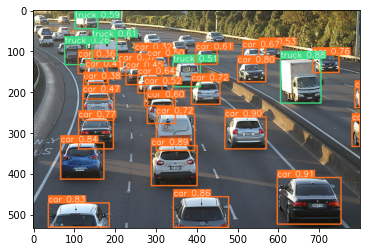

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[251, 216, 174],
         [254, 219, 177],
         [246, 213, 168],
         ...,
         [128, 148, 146],
         [ 70,  79,  52],
         [ 64,  71,  29]],
 
        [[235, 201, 156],
         [234, 200, 155],
         [221, 189, 142],
         ...,
         [122, 141, 139],
         [ 85,  91,  65],
         [ 47,  52,  11]],
 
        [[253, 219, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [136, 155, 153],
         [ 69,  73,  46],
         [ 60,  62,  22]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [8]:
import uuid   # Unique identifier
import os
import time

In [55]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [56]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [53]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.9d6e6b9b-54a8-11ee-b54f-3800256282b0.jpg


In [54]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.a196a7e3-54a8-11ee-af9d-3800256282b0.jpg
data\images\awake.a196cdc0-54a8-11ee-b2e6-3800256282b0.jpg
data\images\awake.a196cdc1-54a8-11ee-b7ac-3800256282b0.jpg
data\images\awake.a196df5c-54a8-11ee-b43e-3800256282b0.jpg
data\images\awake.a196df5d-54a8-11ee-b8e6-3800256282b0.jpg
data\images\awake.a196df5e-54a8-11ee-adf4-3800256282b0.jpg
data\images\awake.a196df5f-54a8-11ee-b11f-3800256282b0.jpg
data\images\awake.a196df60-54a8-11ee-9820-3800256282b0.jpg
data\images\awake.a196df61-54a8-11ee-85ba-3800256282b0.jpg
data\images\awake.a196f324-54a8-11ee-a671-3800256282b0.jpg
data\images\awake.a196f325-54a8-11ee-b60d-3800256282b0.jpg
data\images\awake.a196f326-54a8-11ee-8540-3800256282b0.jpg
data\images\awake.a196f327-54a8-11ee-9e2c-3800256282b0.jpg
data\images\awake.a196f328-54a8-11ee-a0d3-3800256282b0.jpg
data\images\awake.a196f329-54a8-11ee-a250-3800256282b0.jpg
data\images\awake.a196f32a-54a8-11ee-8269-3800256282b0.jpg
data\images\awake.a196f32b-54a8-11ee-84fe-3800256282b0.j

In [9]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [10]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [5]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 0

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-218-g9e97ac3 Python-3.9.7 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 

    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages

    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    raise err
OSErro

  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spa

    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<st

    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<st

  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    raise err
    prepare(preparation_data)
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLO

  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
Traceback (most recent call last):
  File "<string>", line 1, in <module>
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prep

OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in

    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentin

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", l

    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py

  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\

    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_co

  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    prepare(preparation_data)
    exec(code, run_globals)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\6

  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\mul

  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\mul

  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_op

  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for th

    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__in

  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anac

  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    prepare(preparation_data)
  File "C:\Users\6

    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error lo

    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torc

  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\cudnn_cnn_infer64_8.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py

  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_

    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\anaconda3\lib\site-packages

    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    _run_code(code, mod_globals, init_globals,
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    exec(code, run_globals)
  File "C:\Users\60112\YO

  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", line 35, in <module>
    import torch
  File "C:\Users\60112\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\60112\

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    main_content = runpy.run_path(main_path,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 268, in run_path
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 97, in _run_module_code
    prepare(preparation_data)
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\60112\anaconda3\lib\runpy.py", line 87, in _run_code
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\60112\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    exec(code, run_globals)
  File "C:\Users\60112\YOLOv5\yolov5\train.py", l

  0%|          | 0/3 [00:00<?, ?it/s]
     28/499      1.38G    0.06353    0.01301     0.0327         28        320:   0%|          | 0/3 [00:00<?, ?it/s]
     28/499      1.38G    0.06353    0.01301     0.0327         28        320:  33%|###3      | 1/3 [00:00<00:01,  1.57it/s]
     28/499      1.38G    0.06657    0.01532    0.03272         38        320:  33%|###3      | 1/3 [00:01<00:01,  1.57it/s]
     28/499      1.38G    0.06657    0.01532    0.03272         38        320:  67%|######6   | 2/3 [00:01<00:00,  1.41it/s]
     28/499      1.38G    0.06615    0.01502    0.03286         16        320:  67%|######6   | 2/3 [00:01<00:00,  1.41it/s]
     28/499      1.38G    0.06615    0.01502    0.03286         16        320: 100%|##########| 3/3 [00:01<00:00,  1.77it/s]
     28/499      1.38G    0.06615    0.01502    0.03286         16        320: 100%|##########| 3/3 [00:01<00:00,  1.68it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%

                   all         40         40      0.522      0.661      0.663      0.185

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
     41/499      1.38G    0.05951    0.01348    0.02946         29        320:   0%|          | 0/3 [00:00<?, ?it/s]
     41/499      1.38G    0.05951    0.01348    0.02946         29        320:  33%|###3      | 1/3 [00:00<00:01,  1.55it/s]
     41/499      1.38G    0.05816    0.01585    0.02894         38        320:  33%|###3      | 1/3 [00:01<00:01,  1.55it/s]
     41/499      1.38G    0.05816    0.01585    0.02894         38        320:  67%|######6   | 2/3 [00:01<00:00,  1.59it/s]
     41/499      1.38G    0.05892    0.01619    0.02953         19        320:  67%|######6   | 2/3 [00:01<00:00,  1.59it/s]
     41/499      1.38G    0.05892    0.01619    0.02953         19        320: 100%|##########| 3/3 [00:01<00:00,  2.00it/s]
     41/499      1.38G    0.05892    0.01619    0.0

     59/499      1.38G    0.05978     0.0128    0.01845         23        320: 100%|##########| 3/3 [00:01<00:00,  1.84it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 1/2 [00:00<00:00,  1.98it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  3.37it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  3.05it/s]
                   all         40         40      0.369      0.875      0.639      0.351

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
     60/499      1.38G     0.0531    0.01311     0.0163         35        320:   0%|          | 0/3 [00:00<?, ?it/s]
     60/499   

    153/499      1.38G    0.02946   0.008413    0.01079         34        320:   0%|          | 0/3 [00:00<?, ?it/s]
    153/499      1.38G    0.02946   0.008413    0.01079         34        320:  33%|###3      | 1/3 [00:00<00:01,  1.57it/s]
    153/499      1.38G     0.0271   0.008307    0.01211         33        320:  33%|###3      | 1/3 [00:01<00:01,  1.57it/s]
    153/499      1.38G     0.0271   0.008307    0.01211         33        320:  67%|######6   | 2/3 [00:01<00:00,  1.65it/s]
    153/499      1.38G    0.02714   0.007675   0.009847         13        320:  67%|######6   | 2/3 [00:01<00:00,  1.65it/s]
    153/499      1.38G    0.02714   0.007675   0.009847         13        320: 100%|##########| 3/3 [00:01<00:00,  2.09it/s]
    153/499      1.38G    0.02714   0.007675   0.009847         13        320: 100%|##########| 3/3 [00:01<00:00,  1.94it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/2 [00:00<?, ?it/s]
    


                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 1/2 [00:00<00:00,  2.00it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  3.38it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  3.06it/s]
                   all         40         40      0.814      0.987      0.995      0.641

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
    164/499      1.38G     0.0273   0.006783   0.007752         28        320:   0%|          | 0/3 [00:00<?, ?it/s]
    164/499      1.38G     0.0273   0.006783   0.007752         28        320:  33%|###3      | 1/3 [00:00<00:01,  1.54it/s]
    164/499   

    173/499      1.38G    0.02485   0.008434   0.006976         17        320: 100%|##########| 3/3 [00:01<00:00,  1.86it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 1/2 [00:00<00:00,  2.08it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  3.10it/s]
                   all         40         40      0.957          1      0.995      0.781

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
    174/499      1.38G    0.02222   0.006466   0.006159         27        320:   0%|          | 0/3 [00:00<?, ?it/s]
    174/499   


                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 1/2 [00:00<00:00,  2.00it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  3.42it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  3.09it/s]
                   all         40         40      0.997          1      0.995       0.85

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
    281/499      1.38G     0.0192   0.006121   0.004632         31        320:   0%|          | 0/3 [00:00<?, ?it/s]
    281/499      1.38G     0.0192   0.006121   0.004632         31        320:  33%|###3      | 1/3 [00:00<00:01,  1.54it/s]
    281/499   

                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  2.65it/s]
                   all         40         40      0.996          1      0.995      0.821

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
    291/499      1.38G    0.02397   0.006378   0.004703         33        320:   0%|          | 0/3 [00:00<?, ?it/s]
    291/499      1.38G    0.02397   0.006378   0.004703         33        320:  33%|###3      | 1/3 [00:00<00:01,  1.37it/s]
    291/499      1.38G     0.0245   0.006783   0.004666         35        320:  33%|###3      | 1/3 [00:01<00:01,  1.37it/s]
    291/499      1.38G     0.0245   0.006783   0.004666         35        320:  67%|######6   | 2/3 [00:01<00:00,  1.44it/s]
    291/499      1.38G    0.02467   0.008067   0.005469         22        320:  67%|######6   | 2/3 [00:01<00:00,  1.44it/s]
    291/499      1.38G    0.02467   0.00

    301/499      1.38G    0.01627   0.007817   0.007422         26        320: 100%|##########| 3/3 [00:01<00:00,  1.91it/s]
    301/499      1.38G    0.01627   0.007817   0.007422         26        320: 100%|##########| 3/3 [00:01<00:00,  1.77it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 1/2 [00:00<00:00,  1.93it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  2.95it/s]
                   all         40         40      0.996          1      0.995      0.942

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
    30


  0%|          | 0/3 [00:00<?, ?it/s]
    395/499      1.38G    0.01569   0.005417   0.004779         29        320:   0%|          | 0/3 [00:00<?, ?it/s]
    395/499      1.38G    0.01569   0.005417   0.004779         29        320:  33%|###3      | 1/3 [00:00<00:01,  1.58it/s]
    395/499      1.38G    0.01584   0.005628   0.004225         30        320:  33%|###3      | 1/3 [00:01<00:01,  1.58it/s]
    395/499      1.38G    0.01584   0.005628   0.004225         30        320:  67%|######6   | 2/3 [00:01<00:00,  1.54it/s]
    395/499      1.38G    0.01464   0.005341   0.003915         14        320:  67%|######6   | 2/3 [00:01<00:00,  1.54it/s]
    395/499      1.38G    0.01464   0.005341   0.003915         14        320: 100%|##########| 3/3 [00:01<00:00,  1.90it/s]
    395/499      1.38G    0.01464   0.005341   0.003915         14        320: 100%|##########| 3/3 [00:01<00:00,  1.79it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0

                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:00<00:00,  3.10it/s]
                   all         40         40      0.997          1      0.995      0.925

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
    409/499      1.38G    0.01278   0.005268   0.002197         33        320:   0%|          | 0/3 [00:00<?, ?it/s]
    409/499      1.38G    0.01278   0.005268   0.002197         33        320:  33%|###3      | 1/3 [00:00<00:01,  1.46it/s]
    409/499      1.38G     0.0119   0.004941   0.002213         34        320:  33%|###3      | 1/3 [00:01<00:01,  1.46it/s]
    409/499      1.38G     0.0119   0.004941   0.002213         34        320:  67%|######6   | 2/3 [00:01<00:00,  1.53it/s]
    409/499      1.38G    0.0

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
    417/499      1.38G    0.01093   0.004475   0.002237         32        320:   0%|          | 0/3 [00:00<?, ?it/s]
    417/499      1.38G    0.01093   0.004475   0.002237         32        320:  33%|###3      | 1/3 [00:00<00:01,  1.41it/s]
    417/499      1.38G    0.01211   0.004074   0.002777         28        320:  33%|###3      | 1/3 [00:01<00:01,  1.41it/s]
    417/499      1.38G    0.01211   0.004074   0.002777         28        320:  67%|######6   | 2/3 [00:01<00:00,  1.49it/s]
    417/499      1.38G    0.01251   0.004535   0.002595         17        320:  67%|######6   | 2/3 [00:01<00:00,  1.49it/s]
    417/499      1.38G    0.01251   0.004535   0.002595         17        320: 100%|##########| 3/3 [00:01<00:00,  1.89it/s]
    417/499      1.38G    0.01251   0.004535   0.002595         17        320: 100%|##########| 3/3 [00:01<00:00,  1.75it/s]

               

# 6. Load Custom Model

In [11]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp10/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\60112/.cache\torch\hub\master.zip
YOLOv5  2023-9-17 Python-3.9.7 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [30]:
img = os.path.join('data', 'images', 'drowsy.95c3b8f5-54a8-11ee-b6f3-3800256282b0.jpg')

In [31]:
results = model(img)

In [32]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 10.6ms pre-process, 103.2ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


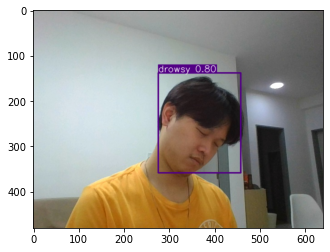

In [33]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()